## Library Import

In [71]:
# Code you have previously used to load data
import numpy as np
import pandas as pd # load data and one-hot encoding

## Data Import

In [79]:
df = pd.read_csv('/Users/flp-13-achmadrozie/Downloads/mtCars - Sheet1.csv')

In [80]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### Correlation Checking - untuk mencegah multikolinearitas

In [81]:
# drop string variable
df = df.drop('model', axis=1)
correlation_matrix = df.corr()


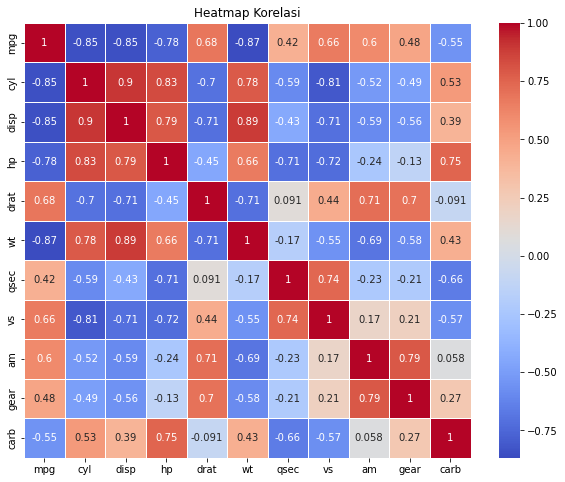

In [82]:
plt.figure(figsize=(10, 8))  # Ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()


Test dengan Menghilangkan Korelasi tinggi

In [100]:
X = df.drop(columns=['mpg'])

In [101]:
# Menghitung matriks korelasi
correlation_matrix = X.corr()

# Menentukan threshold korelasi
threshold = 0.75

# Mengidentifikasi variabel yang memiliki korelasi tinggi
high_corr_cols = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_cols.add(colname)

# Menghilangkan variabel yang memiliki korelasi tinggi
df_filtered = X.drop(columns=high_corr_cols)

print("DataFrame setelah menghilangkan variabel dengan korelasi tinggi:")
print(df_filtered)


DataFrame setelah menghilangkan variabel dengan korelasi tinggi:
    cyl  drat   qsec  am  carb
0     6  3.90  16.46   1     4
1     6  3.90  17.02   1     4
2     4  3.85  18.61   1     1
3     6  3.08  19.44   0     1
4     8  3.15  17.02   0     2
5     6  2.76  20.22   0     1
6     8  3.21  15.84   0     4
7     4  3.69  20.00   0     2
8     4  3.92  22.90   0     2
9     6  3.92  18.30   0     4
10    6  3.92  18.90   0     4
11    8  3.07  17.40   0     3
12    8  3.07  17.60   0     3
13    8  3.07  18.00   0     3
14    8  2.93  17.98   0     4
15    8  3.00  17.82   0     4
16    8  3.23  17.42   0     4
17    4  4.08  19.47   1     1
18    4  4.93  18.52   1     2
19    4  4.22  19.90   1     1
20    4  3.70  20.01   0     1
21    8  2.76  16.87   0     2
22    8  3.15  17.30   0     2
23    8  3.73  15.41   0     4
24    8  3.08  17.05   0     2
25    4  4.08  18.90   1     1
26    4  4.43  16.70   1     2
27    4  3.77  16.90   1     2
28    8  4.22  14.50   1     4
29   

In [102]:
X_cleansed = df[['cyl','drat','qsec','am','carb']]
y_cleansed = df['mpg']

In [103]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X)
model = sm.OLS(y_cleansed, X_cleansed).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              343.5
Date:                Sat, 12 Aug 2023   Prob (F-statistic):                    1.52e-23
Time:                        20:11:25   Log-Likelihood:                         -76.058
No. Observations:                  32   AIC:                                      162.1
Df Residuals:                      27   BIC:                                      169.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [104]:
# Check multicollinearity using VIF

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_cleansed.columns
vif_data["VIF"] = [variance_inflation_factor(X_cleansed.values, i) for i in range(len(X_cleansed.columns))]

print(vif_data)

  feature         VIF
0     cyl   21.386214
1    drat  105.757854
2    qsec   88.304568
3      am    4.764444
4    carb    8.170409


In [112]:
X_cleansed_2 = df[['cyl','qsec','am','carb']]
y_cleansed_2 = df['mpg']

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_cleansed_2.columns
vif_data["VIF"] = [variance_inflation_factor(X_cleansed_2.values, i) for i in range(len(X_cleansed_2.columns))]

print(vif_data)

  feature        VIF
0     cyl  21.346727
1    qsec  13.499495
2      am   2.259054
3    carb   7.464366


In [114]:
X_cleansed_3 = df[['qsec','am','carb']]
y_cleansed_3 = df['mpg']

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_cleansed_3.columns
vif_data["VIF"] = [variance_inflation_factor(X_cleansed_3.values, i) for i in range(len(X_cleansed_3.columns))]

print(vif_data)

  feature       VIF
0    qsec  3.626427
1      am  1.647926
2    carb  3.365382


In [116]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X)
model = sm.OLS(y_cleansed_3, X_cleansed_3).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              500.6
Date:                Sat, 12 Aug 2023   Prob (F-statistic):                    4.61e-25
Time:                        20:57:34   Log-Likelihood:                         -79.291
No. Observations:                  32   AIC:                                      164.6
Df Residuals:                      29   BIC:                                      169.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

________________________________